In [ ]:
#Import the required libraries

import numpy as np #linear algebra
import pandas as pd # Data processing, I/0 operations
import matplotlib.pyplot as plt #plotting
import seaborn as sns

%matplotlib inline

In [ ]:
#Load Data

data = pd.read_csv('/content/diabetes.csv')

In [ ]:
#Shape of the Data

data.shape

(768, 9)

In [ ]:
#Preview Head
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Check if the data has any Null values
data.isnull().values.any()

False

In [ ]:
#Check for data correlation

data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
# Checking correlation via visualization

def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

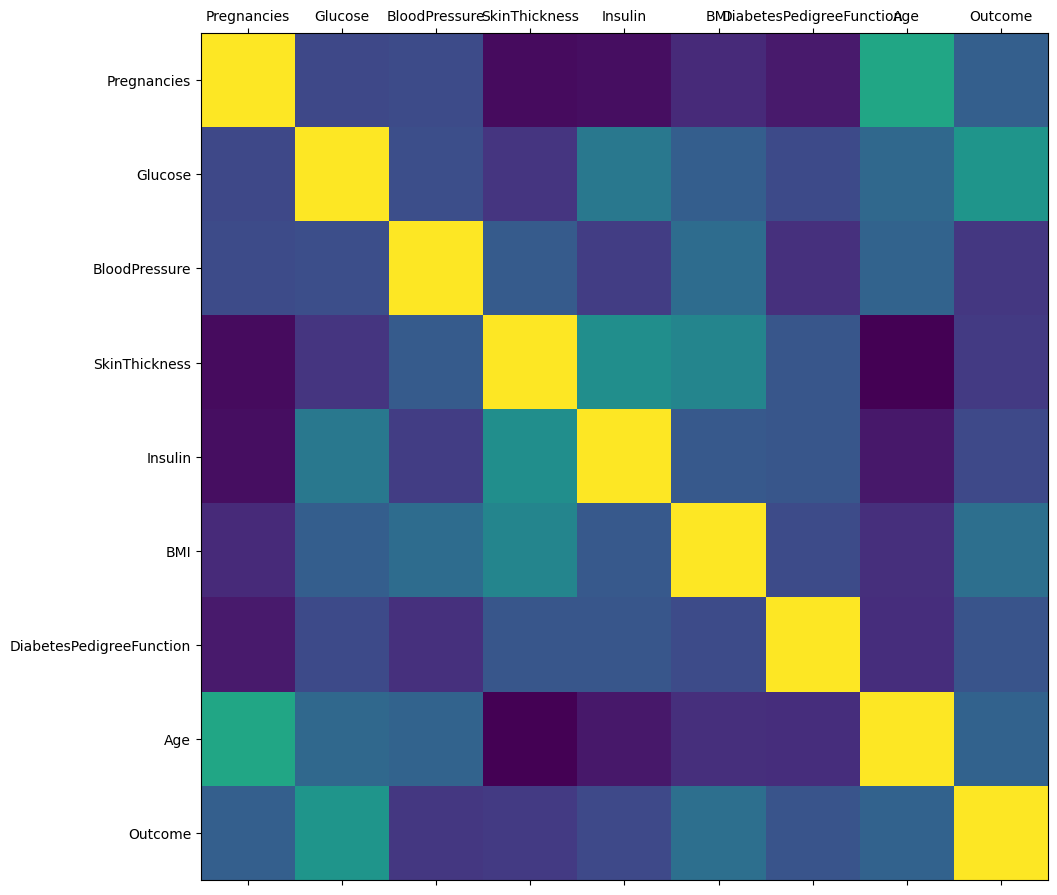

In [ ]:
plot_corr(data)

In [ ]:
#Splitting the data into train & test (train_test_split)

from sklearn.model_selection import train_test_split
X = data.drop('Outcome', axis=1)
Y = data['Outcome']

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=1) # 70-30 data split
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29


In [ ]:
#Checking the percentzge of data in train and test

print("{0:0.2f}% data in the training set".format((len(x_train)/len(data.index))*100))
print("{0:0.2f}% data in the test set".format((len(x_test)/len(data.index))*100))

69.92% data in the training set
30.08% data in the test set


In [ ]:
#Finallizing the data set

from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(missing_values=0, strategy="mean")
cols = x_train.columns
x_train = pd.DataFrame(rep_0.fit_transform(x_train))
x_test = pd.DataFrame(rep_0.fit_transform(x_test))

x_train.columns = cols
x_test.columns = cols

In [ ]:
#Preview the finalized data
x_train.head()

,0,1,2,3,4,5,6,7
0,15.000000,136.0,70.0,32.0,110.000000,37.1,0.153,43.0
1,4.396514,97.0,64.0,36.0,100.000000,36.8,0.600,25.0
2,1.000000,116.0,70.0,28.0,158.243346,27.4,0.204,21.0
3,2.000000,106.0,64.0,35.0,119.000000,30.5,1.400,34.0
4,4.396514,123.0,88.0,37.0,158.243346,35.2,0.197,29.0


In [ ]:
#Naive Bayes Algorithm

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train.ravel())

GaussianNB()

In [ ]:
#Accuracy on training data

model_predict = model.predict(x_train)

from sklearn import metrics

print("Model Accuracy: {0:0.4f}".format(metrics.accuracy_score(y_train, model_predict)))

Model Accuracy: 0.7393


In [ ]:
#Accuracy on test data

model_test_predict = model.predict(x_test)

print("Model Accuracy: {0:0.4f}".format(metrics.accuracy_score(y_test, model_test_predict)))

Model Accuracy: 0.7706


Confusion Matrix


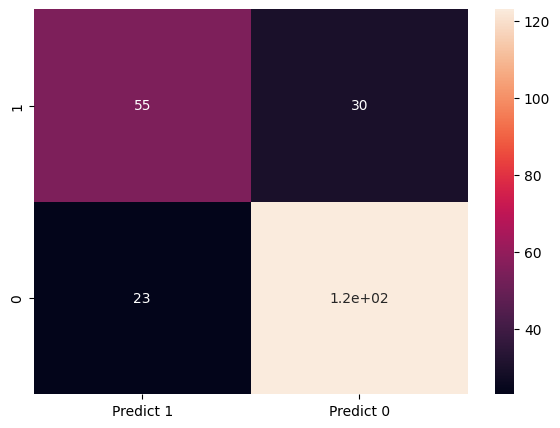

In [ ]:
#Preparing a confusion matrix for the data

print("Confusion Matrix")
cm = metrics.confusion_matrix(y_test, model_test_predict, labels=[1,0])
data_cm = pd.DataFrame(cm, index = [i for i in ['1', '0']],
                      columns=[i for i in ['Predict 1', 'Predict 0']])
plt.figure(figsize=(7,5))
sns.heatmap(data_cm, annot=True)
plt.show()

In [ ]:
#Simple report for classification

print("Classification report")
print(metrics.classification_report(y_test, model_test_predict, labels=[1,0]))

Classification report
              precision    recall  f1-score   support

           1       0.71      0.65      0.67        85
           0       0.80      0.84      0.82       146

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



Random Forest Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


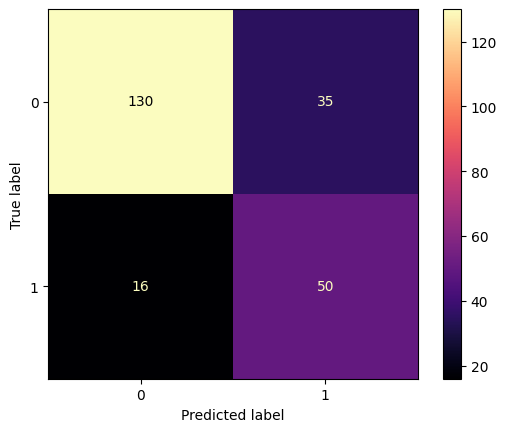

In [ ]:
from sklearn import metrics
cm=metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_pred,y_test,labels=lr.classes_),
                              display_labels=lr.classes_)
cm.plot(cmap="magma")

In [ ]:
score1=  metrics.accuracy_score(y_pred, y_test)
print('Accuracy score is', np.round(score1*100,2),'%')

Accuracy score is 77.92 %


In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(criterion = "gini",
                                       min_samples_leaf = 1,
                                       min_samples_split = 10,
                                       n_estimators=100,
                                       max_features='auto',
                                       oob_score=True,
                                       random_state=1,
                                       n_jobs=-1)

random_forest.fit(x_train, y_train)
y_pred2 = random_forest.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
confmat1 = metrics.confusion_matrix(y_pred2, y_test)
confmat1

array([[133,  34],
       [ 13,  51]])

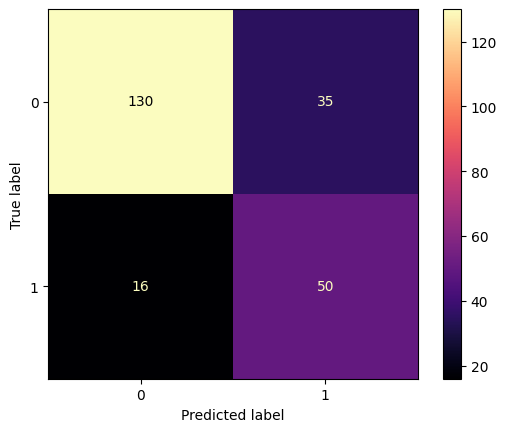

In [ ]:
from sklearn import metrics
cm=metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_pred,y_test,labels=random_forest.classes_),
                              display_labels=random_forest.classes_)
cm.plot(cmap="magma")

In [ ]:
score2=  metrics.accuracy_score(y_pred2, y_test)
print('Accuracy score is', np.round(score2*100,2),'%')


Accuracy score is 79.65 %
